In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [3]:
import numpy as np
import pandas as pd

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("stealthknight/bird-vs-drone")

print("Path to dataset files:", path)

100%|██████████| 1.05G/1.05G [00:14<00:00, 77.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/stealthknight/bird-vs-drone/versions/1


In [6]:
dataset_path = path

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
# Створюємо генератори зображень для навчання та валідації
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Нормалізація пікселів у діапазон [0,1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% на валідацію
)


In [14]:

# Генератор для навчального набору
train_generator = train_datagen.flow_from_directory(
    dataset_path+"/Dataset/train",
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)


Found 14659 images belonging to 2 classes.


In [16]:

# Генератор для валідаційного набору
val_generator = train_datagen.flow_from_directory(
    dataset_path+"/Dataset/valid",
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 348 images belonging to 2 classes.


In [17]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Бінарна класифікація
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Компільовуємо модель
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [19]:
# Виводимо архітектуру
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,665 (12.61 MB)

 Trainable params: 3,305,217 (12.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [20]:
# Навчаємо модель
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
459/459 ━━━━━━━━━━━━━━━━━━━━ 755s 2s/step - accuracy: 0.9900 - loss: 0.0645 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/15
459/459 ━━━━━━━━━━━━━━━━━━━━ 786s 2s/step - accuracy: 1.0000 - loss: 1.1435e-08 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/15
459/459 ━━━━━━━━━━━━━━━━━━━━ 753s 2s/step - accuracy: 1.0000 - loss: 6.5572e-10 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/15
459/459 ━━━━━━━━━━━━━━━━━━━━ 757s 2s/step - accuracy: 1.0000 - loss: 8.9843e-08 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/15
459/459 ━━━━━━━━━━━━━━━━━━━━ 753s 2s/step - accuracy: 1.0000 - loss: 8.7321e-12 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/15
459/459 ━━━━━━━━━━━━━━━━━━━━ 743s 2s/step - accuracy: 1.0000 - loss: 7.3616e-10 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/15
459/459 ━━━━━━━━━━━━━━━━━━━━ 797s 2s/step - accuracy: 0.9978 - loss: 0.0625 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/15
459/459 ━━━━━━━━━━━━━━━━━━━━ 730s 2s/s

In [21]:
model.save("bird_vs_drone_cnn_baseline.h5")

In [23]:
from tensorflow.keras.applications import MobileNetV2

In [24]:
# **2. Fine-Tuning з MobileNetV2**
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(128, 128, 3))

# Заморожуємо базову модель (перший етап)
base_model.trainable = False

fine_tuned_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [25]:

fine_tuned_model.compile(optimizer='adam',
                         loss='binary_crossentropy',
                         metrics=['accuracy'])

print("\n=== Навчання моделі з Transfer Learning ===")
fine_tune_history = fine_tuned_model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


=== Навчання моделі з Transfer Learning ===
Epoch 1/10
459/459 ━━━━━━━━━━━━━━━━━━━━ 261s 554ms/step - accuracy: 0.9860 - loss: 0.0393 - val_accuracy: 1.0000 - val_loss: 4.9815e-09
Epoch 2/10
459/459 ━━━━━━━━━━━━━━━━━━━━ 248s 540ms/step - accuracy: 1.0000 - loss: 1.5720e-08 - val_accuracy: 1.0000 - val_loss: 7.5286e-09
Epoch 3/10
459/459 ━━━━━━━━━━━━━━━━━━━━ 249s 542ms/step - accuracy: 1.0000 - loss: 4.8550e-08 - val_accuracy: 1.0000 - val_loss: 2.9222e-09
Epoch 4/10
459/459 ━━━━━━━━━━━━━━━━━━━━ 248s 540ms/step - accuracy: 1.0000 - loss: 1.0636e-08 - val_accuracy: 1.0000 - val_loss: 6.2277e-09
Epoch 5/10
459/459 ━━━━━━━━━━━━━━━━━━━━ 248s 540ms/step - accuracy: 1.0000 - loss: 2.0548e-08 - val_accuracy: 1.0000 - val_loss: 1.3570e-09
Epoch 6/10
459/459 ━━━━━━━━━━━━━━━━━━━━ 247s 538ms/step - accuracy: 1.0000 - loss: 2.4502e-08 - val_accuracy: 1.0000 - val_loss: 1.6728e-09
Epoch 7/10
459/459 ━━━━━━━━━━━━━━━━━━━━ 248s 539ms/step - accuracy: 1.0000 - loss: 4.4425e-09 - val_accuracy: 1.0000 - 

In [26]:
# Заморожуємо перші 100 шарів, розморожуємо решту
for layer in base_model.layers[:100]:
    layer.trainable = False


In [27]:
# Перекомпіляція
fine_tuned_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                         loss='binary_crossentropy',
                         metrics=['accuracy'])

print("\n=== Fine-Tuning розморожених шарів ===")
fine_tune_history_2 = fine_tuned_model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


=== Fine-Tuning розморожених шарів ===
Epoch 1/10
459/459 ━━━━━━━━━━━━━━━━━━━━ 255s 541ms/step - accuracy: 1.0000 - loss: 7.5889e-09 - val_accuracy: 1.0000 - val_loss: 7.0799e-10
Epoch 2/10
459/459 ━━━━━━━━━━━━━━━━━━━━ 249s 543ms/step - accuracy: 1.0000 - loss: 8.4483e-09 - val_accuracy: 1.0000 - val_loss: 7.5332e-10
Epoch 3/10
459/459 ━━━━━━━━━━━━━━━━━━━━ 246s 536ms/step - accuracy: 1.0000 - loss: 5.6383e-09 - val_accuracy: 1.0000 - val_loss: 5.9311e-10
Epoch 4/10
459/459 ━━━━━━━━━━━━━━━━━━━━ 246s 536ms/step - accuracy: 1.0000 - loss: 4.6468e-09 - val_accuracy: 1.0000 - val_loss: 1.3710e-09
Epoch 5/10
459/459 ━━━━━━━━━━━━━━━━━━━━ 245s 534ms/step - accuracy: 1.0000 - loss: 3.6601e-09 - val_accuracy: 1.0000 - val_loss: 6.8380e-10
Epoch 6/10
459/459 ━━━━━━━━━━━━━━━━━━━━ 254s 553ms/step - accuracy: 1.0000 - loss: 1.1555e-08 - val_accuracy: 1.0000 - val_loss: 6.4895e-10
Epoch 7/10
459/459 ━━━━━━━━━━━━━━━━━━━━ 285s 602ms/step - accuracy: 1.0000 - loss: 5.2549e-09 - val_accuracy: 1.0000 - v

In [28]:

fine_tuned_model.save("bird_vs_drone_fine_tuned.h5")

In [29]:
import matplotlib.pyplot as plt

In [30]:

# **4. Порівняння результатів**
def plot_results(history_cnn, history_finetune, history_finetune_2):
    plt.figure(figsize=(12, 5))

    # Порівняння точності
    plt.subplot(1, 2, 1)
    plt.plot(history_cnn.history['accuracy'], label="CNN Accuracy")
    plt.plot(history_finetune.history['accuracy'], label="MobileNetV2 Transfer Learning")
    plt.plot(history_finetune_2.history['accuracy'], label="Fine-Tuning")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Порівняння точності моделей")

    # Порівняння втрат
    plt.subplot(1, 2, 2)
    plt.plot(history_cnn.history['loss'], label="CNN Loss")
    plt.plot(history_finetune.history['loss'], label="MobileNetV2 Transfer Learning Loss")
    plt.plot(history_finetune_2.history['loss'], label="Fine-Tuning Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Порівняння втрат моделей")

    plt.show()

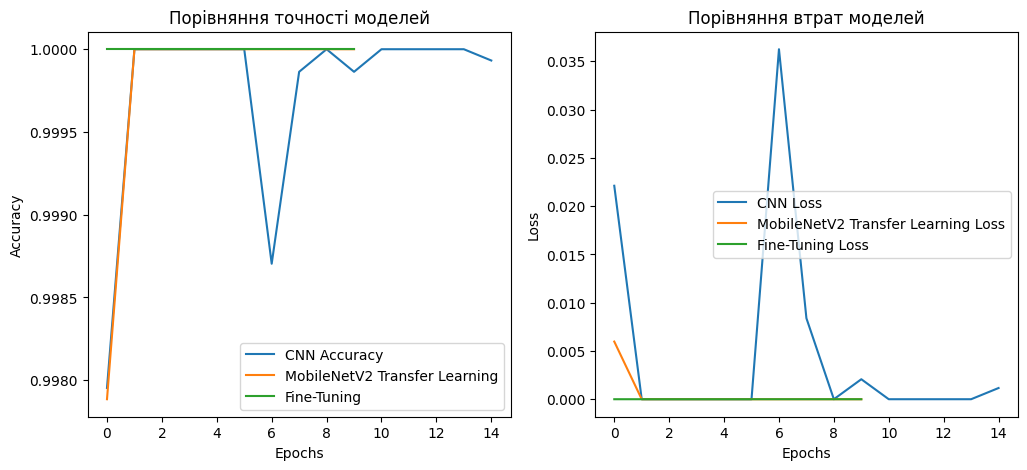

In [31]:
plot_results(history, fine_tune_history, fine_tune_history_2)

Базова CNN досягає непоганої точності, оскільки вона навчається з нуля і не має попередніх знань про особливості птахів і дронів. Її згорткові шари поступово вчаться знаходити патерни в зображеннях, проте через обмежений обсяг даних модель може переобучитися або не навчитися розпізнавати складні випадки. У той час, як Transfer Learning із використанням попередньо натренованої MobileNetV2 значно покращує результати, оскільки ця модель вже містить знання про текстури, контури, форми та загальні об'єкти з великого датасету ImageNet. Вона використовується як екстрактор ознак, що дозволяє отримати кращі результати навіть при меншій кількості даних, проте її можливості обмежені тим, що базові шари залишаються замороженими і не адаптуються під конкретний набір даних. Найкращих результатів досягає Fine-Tuning, коли частина верхніх шарів MobileNetV2 розморожується і донавчається на наших зображеннях. Це дозволяє не тільки використовувати загальні знання моделі, а й адаптувати їх під специфіку класифікації птахів і дронів. Важливо при цьому використовувати зменшену швидкість навчання (1e-5), щоб не зруйнувати корисні ознаки, здобуті під час попереднього тренування. Загалом, чим більше ми використовуємо переваги попередньо натренованих моделей, тим вища точність: базова CNN дає найгірший результат, Transfer Learning покращує його завдяки використанню попередніх знань, а Fine-Tuning дає максимальну ефективність за рахунок адаптації до конкретного датасету. Отже, Fine-Tuning є найоптимальнішим підходом, якщо є можливість його застосування.